In [1]:
'''Objective: To combine the ML input arrays atomic position and lattice data into a single array 
                by use of radial pair distribution function'''

'''Specifically, this model calculates the PDF for Solid Argon, an FCC structure'''

'Specifically, this model calculates the PDF for Solid Argon, an FCC structure'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial 

In [3]:
L= 5.25
X1 = L * np.eye(3)
print(X1)


[[5.25 0.   0.  ]
 [0.   5.25 0.  ]
 [0.   0.   5.25]]


In [4]:
A1= np.array([0,0,0]).reshape(1,3)
A2= np.array([0,0.5,0.5]).reshape(1,3)
A3= np.array([0.5,0.5,0]).reshape(1,3)
A4= np.array([0.5,0,.5]).reshape(1,3)

X2= np.array([[0,0,0],[0,.5,.5], [.5,.5,0], [.5,0,.5]]) 

coor = []
N=1
for i in range(-N,N+1):
    for j in range(-N,N+1):
        for k in range(-N,N+1):
            for x2 in X2:
                coor.append(x2+[i,j,k])

supercell=np.asarray(coor).reshape(4*(2*N+1)**3,3)

In [5]:
rij_dot = np.dot(supercell, X1)

In [6]:
V1= np.dot(A1, X1)
V2= np.dot(A2, X1)
V3= np.dot(A3, X1)
V4= np.dot(A4, X1)

rij_dist1= spatial.distance.cdist(rij_dot, V1, metric='euclidean')
rij_dist2= spatial.distance.cdist(rij_dot, V2, metric='euclidean')
rij_dist3= spatial.distance.cdist(rij_dot, V3, metric='euclidean')
rij_dist4= spatial.distance.cdist(rij_dot, V4, metric='euclidean')


In [7]:
'''Na = number of reference atoms in unit cell 
   r = the radii varying at each step by dr=0.2
   delta function between rij and r gives a 1 or 0 only
         gives 1 only if r<rij<r+dr, meaning we found an atom at that r'''


Na= 4
dr = 0.2
R1= []

r= np.arange(0.2, 10.2, 0.2)

#def delta(r, rij):

for i in np.nditer(r):
    count1=0
    for j in np.nditer(rij_dist1):
        if i < j <= (i+dr):
            count1 += 1
    R1.append(count1)

print(R1)
#print(r)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 12, 0, 0, 0, 12, 0, 0, 0, 8, 0, 0, 0, 24, 0]


In [8]:
R2= []

for i2 in np.nditer(r):
    count2=0
    for j2 in np.nditer(rij_dist2):
        if i2 < j2 <= (i2+dr):
            count2 += 1
    R2.append(count2)

print(R2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 12, 0, 0, 0, 12, 0, 0, 0, 8, 0, 0, 0, 24, 0]


In [9]:
R3=[]
for i3 in np.nditer(r):
    count3=0
    for j3 in np.nditer(rij_dist3):
        if i3 < j3 <= (i3+dr):
            count3 += 1
    R3.append(count3)
    
print(R3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 12, 0, 0, 0, 12, 0, 0, 0, 8, 0, 0, 0, 24, 0]


In [10]:
R4= []
for i4 in np.nditer(r):
    count4=0
    for j4 in np.nditer(rij_dist4):
        if i4 < j4 <= (i4+dr):
            count4 += 1
    R4.append(count4)
    
print(R4)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 12, 0, 0, 0, 12, 0, 0, 0, 8, 0, 0, 0, 24, 0]


In [11]:
R_1 = np.asarray([R1]).reshape(50,1)
R_2 = np.asarray([R2]).reshape(50,1)
R_3 = np.asarray([R3]).reshape(50,1)
R_4 = np.asarray([R4]).reshape(50,1)

add= R_1 + R_2 + R_3 + R_4

In [12]:
#rho= number of particles/volume
rho = 4/ ((L)**3)
print(rho)

0.027642803153007236


In [13]:
from math import pi

K= (4* pi * dr * rho * Na)

kr2 = np.asarray(K*(r**2)).reshape(50,1)

R_norm = add/kr2

#print(R_norm)


Text(0,0.5,'PDF Value')

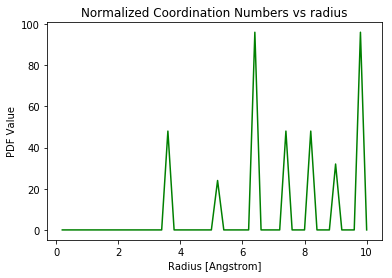

In [14]:
plt.plot(r, add, color=('green'))
plt.title("Normalized Coordination Numbers vs radius")
plt.xlabel("Radius [Angstrom]")
plt.ylabel("PDF Value")

Text(0,0.5,'PDF Value')

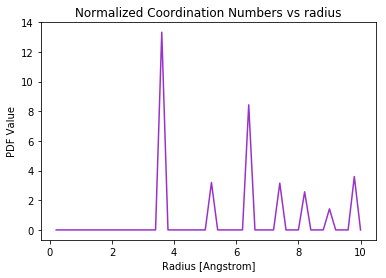

In [15]:
plt.plot(r, R_norm, color=('darkorchid'))
plt.title("Normalized Coordination Numbers vs radius")
plt.xlabel("Radius [Angstrom]")
plt.ylabel("PDF Value")